# Instagram Fake vs. Genuine Account Classification Project

In [1]:
# Instagram Fake vs Genuine Account Classification
# Project by [Your Name] | Internship Submission

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# ------------------- Step 1: Load Training Data -------------------
train_df = pd.read_csv("train.csv")  # Path to training dataset
print(f"Train dataset shape: {train_df.shape}")
print(train_df.head())

Train dataset shape: (576, 12)
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1  

In [4]:
# ------------------- Step 2: Preprocess Data -------------------
# Check for missing values
assert train_df.isnull().sum().sum() == 0, "Missing values found in train data!"

# Separate features and target
X = train_df.drop(['fake'], axis=1)
y = train_df['fake']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [5]:
# ------------------- Step 3: Train Decision Tree Model -------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print(confusion_matrix(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.8706896551724138
[[57  6]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



In [6]:
# ------------------- Step 4: Train Random Forest Model -------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.9137931034482759
[[60  3]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



C:\Users\karthik\AppData\Local\Temp\ipykernel_10340\1624056402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


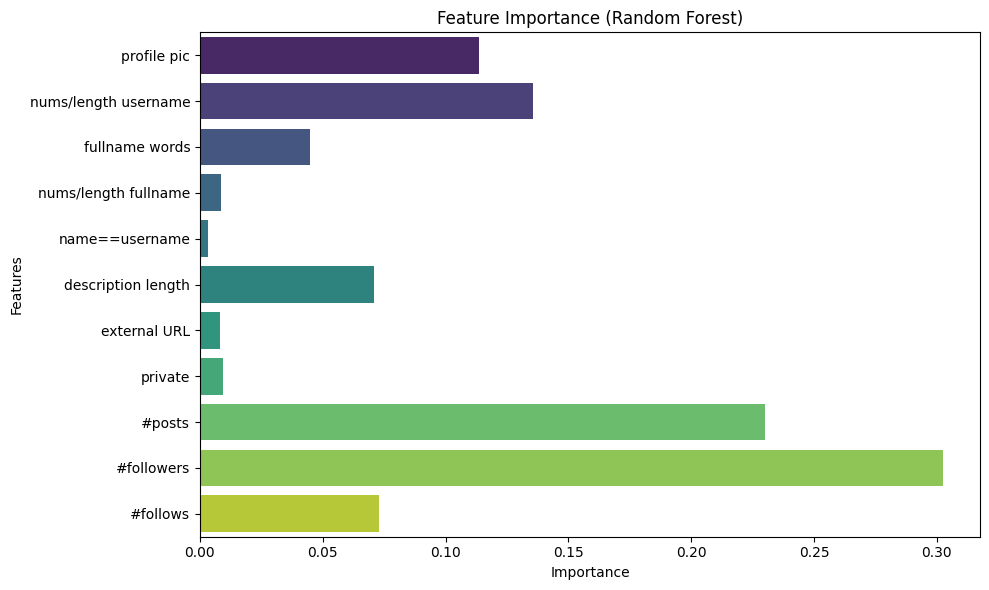

In [7]:
# ------------------- Step 5: Feature Importance Plot -------------------
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [8]:
# ------------------- Step 6: Final Test Set Evaluation -------------------
test_df = pd.read_csv("test.csv")  # Path to test dataset
print(f"\nTest dataset shape: {test_df.shape}")
assert test_df.isnull().sum().sum() == 0, "Missing values found in test data!"

X_test = test_df.drop(['fake'], axis=1)
y_test = test_df['fake']

X_test_scaled = scaler.transform(X_test)
y_test_pred = rf_model.predict(X_test_scaled)

print("\nFinal Test Set Evaluation (on unseen data):")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test dataset shape: (120, 12)

Final Test Set Evaluation (on unseen data):
Accuracy: 0.925
[[56  4]
 [ 5 55]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



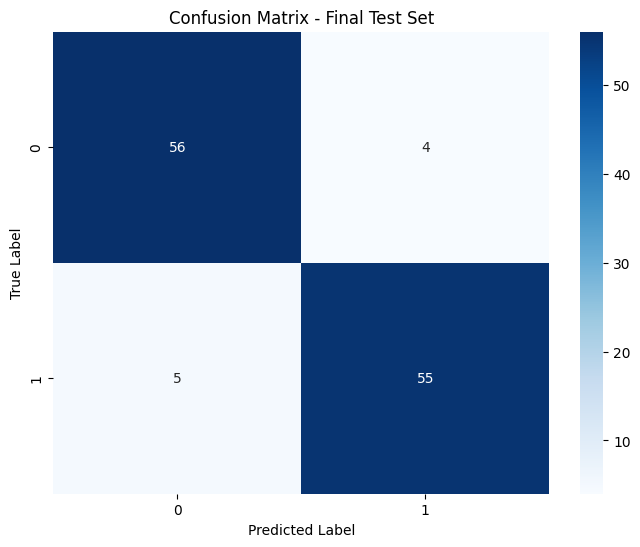

In [9]:
# ------------------- Step 7: Final Summary Plot -------------------
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

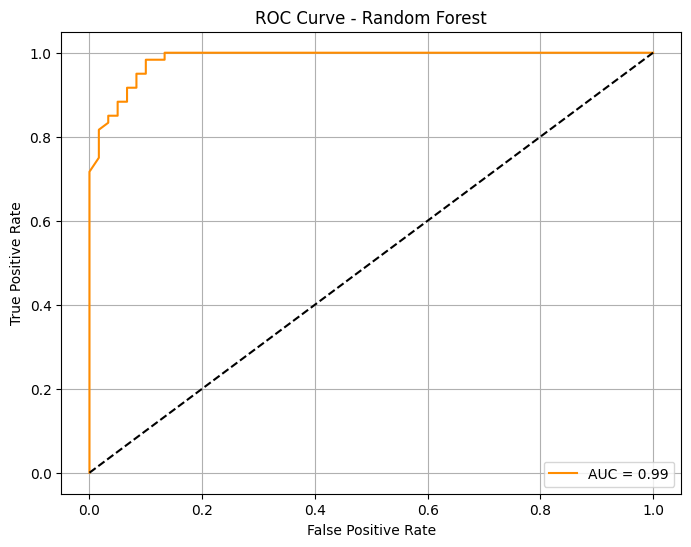

In [5]:
from sklearn.metrics import roc_curve, auc

y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [6]:
import joblib

# Save model and scaler
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']